<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Machine Learning Preliminaries</h1>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%config InlineBackend.figure_format = "retina"

## Álgebra Lineal

**¿Por qué álgebra lineal?**  
Problemas en Machine Learning requiere el manejo de grandes bases de datos, la manipulación de la información dentro de las bases a fin de encontrar patrones por medio de modelos de ML depensen grandemente del álgebra lineal.

Existen tres clases de elementos indispensables para poder trabajar en álgebra líneal. Estos son los escalares, vectores y matrices.

### Escalares
Nos referimos a un escalar como un único número. Al trabajar con un escalar haremos referencia a la clase de elementos al cuál pertenece por medio de la notación

$$
    a \in D
$$

Donde $a$ es el escalar y $D$ el conjunto al cuál pertenece

En python, al declarar
$$
 a \in \mathbb{R}
$$

Sería equivalente a tener una variable `a` de tipo `float`

In [7]:
# Ejemplos de a ∈ R en Python
a = 3.14
a = 0.00
a = 3e5

### Vectores

Un vector es un arreglo ordenado de elementos, todos de la misma clase de elementos. Denotaremos matemáticamente un vector $\bf x$ en negrillas y la i-ésima entrada del vector por medio de $x_i$

$$
{\bf x} = \begin{bmatrix} 
x_1 \\
x_2 \\
\vdots \\
x_N
\end{bmatrix}
$$

Equivalente a un escalar, al declarar un vector denotaremos el conjunto al cual pertenece y los elementos dentro de este. Por ejemplo, si declaramoos el siguiente vector

$$
    {\bf x} \in \mathbb{R}^5
$$

Estaríamos diciendo que $\bf x$ tiene 5 elementos, cada uno de ellos números reales. En Python, esta representación estaría dada por un numpy array de 5 elementos, cada uno de ellos números flotantes

In [8]:
x = np.array([3.4, 1.4, 0.5, 10.4, 0.0])
x

array([ 3.4,  1.4,  0.5, 10.4,  0. ])

Geométricamente, podemos pensar un vector como una flecha que apunta desde el origen hasta una coordenada dada en un espacio $n$-dimensional

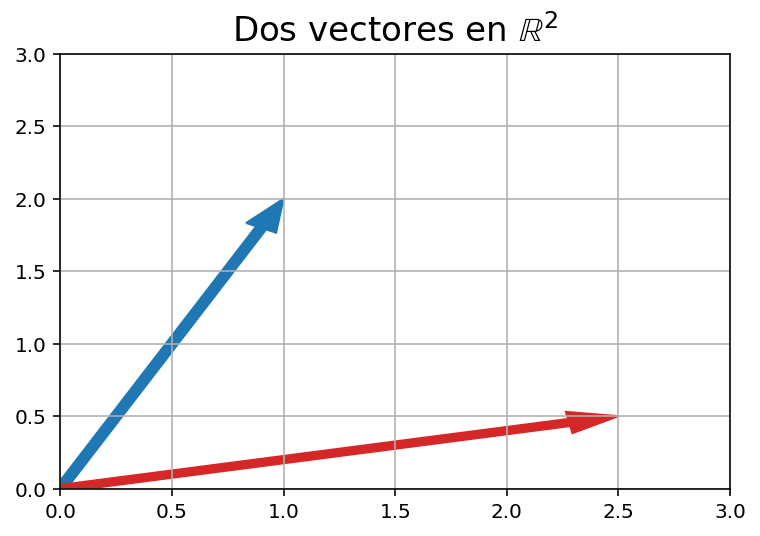

In [9]:
x = np.array([1, 2])
y = np.array([2.5, 0.5])

plt.arrow(0, 0, *x, width=0.05, length_includes_head=True,
          color="tab:blue", )
plt.arrow(0, 0, *y, width=0.05, length_includes_head=True,
          color="tab:red")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.title(r"Dos vectores en $\mathbb{R}^2$", fontsize=17)
plt.grid()

* En una base de datos, un vector estaría dado por una columna dentro de la base (una columna dentro de un Pandas DataFrame)
* Una serie de tiempo sobre el precio de una acción estaría dada por un vector

### Matrices

Una matriz $\bf X$ es un arreglo bi-dimensional de números (equivalente a un numpy array con `ndim == 2`). Denotaremos la $(i, j)$-ésima entrada de una matriz $\bf X$ por medio de $X_{i,j}$.

$$
{\bf X} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,M} \\
x_{1,1} & x_{1,2} & \ldots & x_{2,M} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,M}
\end{bmatrix}
$$

A fin de hacer la notación más compacta, declararemos una matriz $\bf A$ con $N$ filas y $M$ columnas como

$$
    {\bf A} \in \mathbb{R}^{N\times M}
$$

* De una manera geométrica, una matriz representa una _transformación lineal_ de un espacio en $\mathbb{R}^n$. Un ejemplo visual de esto se puede encontrar [aquí](https://www.geogebra.org/m/YCZa8TAH).
* Para fines de un modelo de machine learning, trabajaremos con matrices para representar bases de datos

In [10]:
X = np.array([
    [1.4, 0.5, 0.5],
    [3.1, 1.9, 9.4],
    [0.9, 1.1, 1.3]
])


In [11]:
# Accedemos a la posición i,j de X
i, j = 0, 2
X[i, j]

0.5

#### Notas:

1. Una matriz ${\bf A} \in \mathbb{R}^{n\times n}$ es conocida como una matriz cuadrada
2. Denotamos la matriz identidad $\bf I\in \mathbb{R}^{n\times n}$ como una matriz cuadrada tal que $I_{i,j} = \mathbb{1}_{i=j}$
3. Matemáticamente, expresamos un vector como un vector columna, es decir, ${\bf a} \in \mathbb{R}^{n\times 1}$.

### Propiedades de las martrices

#### Transpuesta

Denotamos la transpuesta de una matriz $\bf X$ como ${\bf X}^T$ y esta la definimos como
$$
    ({\bf X}^T)_{i,j} = {\bf X}_{j,i}
$$

In [12]:
X

array([[1.4, 0.5, 0.5],
       [3.1, 1.9, 9.4],
       [0.9, 1.1, 1.3]])

In [13]:
# En numpy accedemos a la transpuesta de una matriz por medio
# del operador .T
X.T

array([[1.4, 3.1, 0.9],
       [0.5, 1.9, 1.1],
       [0.5, 9.4, 1.3]])

In [14]:
X.T[i,j] == X[j,i]

True

#### Producto entrada a entrada (Hadamard)

Denotaremos el producto entrada a entrada entre dos matrices ${\bf A} \in \mathbb{R}^{N\times M}$, ${\bf B} \in \mathbb{R}^{N\times M}$ como
$$
    {\bf A} \odot {\bf B}
$$

Tal que $({\bf A} \odot {\bf B})_{i,j} = A_{i,j} B_{i, j}$

In [15]:
A = np.array([
    [1, 3],
    [4, 1]
])

B = np.array([
    [0, 1],
    [1, 2]
])

In [16]:
# En numpy, denotamos el producto entrada a entrada entre dos matrices
# A, B por medio de * 
A * B

array([[0, 3],
       [4, 2]])

#### Multiplicación de matrices y vectores

Definimos el producto punto entre dos vectores $a, b \in \mathbb{R}^n$ como 

$$
    {\bf a}^T {\bf b} = \sum_{i=1}^n a_i b_i
$$

In [17]:
# Podemos calcular el producto punto entre dos numpy arrays
# a, b por medio de @
a = np.array([1, 4, 0.5, 4])
b = np.array([2, 0.9, 1, 2])

a.T @ b # == (a * b).sum()

14.1

Sean ${\bf A} \in \mathbb{R}^{n\times m}$, ${\bf B} \in \mathbb{R}^{m\times o}$, definimos la multiplicación entre $\bf A$ y $\bf B$ como una matriz $\bf C$ tal que

$$
    C_{i,j} = \sum_{k}A_{i,k}B_{k,j}
$$

**nota**: La definición de multiplicación de matrices está definida siempre y cuando $\bf A$ tenga el mismo número de columnas como filas tenga $\bf B$

In [18]:
A = np.array([
    [1, 3, 4],
    [4, 5, 1],
    [4, 1, 3],
    [0, 0, 1],
    
])

B = np.array([
    [2.0, 1.0, 0.7],
    [0.5, 0.5, 0.4],
    [0.4, 1.1, 3.5],
    [1.4, 5.6, 1.9],
    
]).T

In [19]:
# En numpy, dadas dos matrices A y B, calculamos la multiplicación
# matricial entre A y B por medio de @
C = A @ B
C

array([[ 7.8,  3.6, 17.7, 25.8],
       [13.7,  4.9, 10.6, 35.5],
       [11.1,  3.7, 13.2, 16.9],
       [ 0.7,  0.4,  3.5,  1.9]])

In [20]:
i, j = 0, 1
C[i, j] # == (A[i, :] * B[:, j]).sum()

3.6

#### Matrices Inversas

Denotamos la inversa de una matriz ${\bf A} \in \mathbb{R}^{n\times n}$ como ${\bf A}^{-1}$ y es definida de tal manera que

$$
    {\bf A}^{-1}{\bf A} = {\bf I}
$$

In [21]:
A = np.array([
    [4, 3],
    [3, 2],
])

Ai = np.array([
    [-2,  3],
    [ 3, -4]
])

A @ Ai

array([[1, 0],
       [0, 1]])

En numpy podemos calcular la inversa de una matriz por medio de la función `inv` dentro de `numpy.linalg`

In [22]:
from numpy.linalg import inv
inv(A)

array([[-2.,  3.],
       [ 3., -4.]])

#### Sistemas de ecuaciones

Una de las aplicaciones de una matriz inversa es la resolución de un sistema lineal de ecuaciones: Sea ${\bf A} \in \mathbb{R}^{n\times n}$, ${\bf x} \in \mathbb{R}^{n}$ y ${\bf b} \in \mathbb{R}^{n}$ donde ${\bf A}$ y ${\bf b}$ son una matriz y un vector conocido respectivamente. Queremos encontrar ${\bf x}$ tal que satisfaga

$$
\begin{align}
    &{\bf A}{\bf x} = {\bf b} \\
    \implies &  {\bf A}^{-1}{\bf A}{\bf x} = {\bf A}^{-1}{\bf b} \\
    \implies &  {\bf x} = {\bf A}^{-1}{\bf b} \\
\end{align}
$$

In [23]:
A = np.array([
    [1, 4],
    [3, 4]
])

b = np.array([1, -1]).reshape(-1, 1)

In [24]:
# Forma explicita de resolver el sistema
inv(A) @ b

array([[-1. ],
       [ 0.5]])

In [25]:
from numpy.linalg import solve
# La función solve dentro de numpy.linalg contiene un
# algoritmo más eficiente y preciso para resolver un sistema
# de ecuaciones
solve(A, b)

array([[-1. ],
       [ 0.5]])

#### Determinante

La determinante de una matriz ${\bf A} \in \mathbb{R}^{n\times n}$ es un valor escalar que describe ciertas propiedades de la transformación lineal describida por la matriz. Denotamos la determinante de una matriz ${\bf A}$ por


$$
    |{\bf A}|
$$

In [26]:
A = np.array([
    [1, 4],
    [3, 4]
])

In [27]:
np.linalg.det(A)

-8.000000000000002

### Propiedades Adicionales de Matrices

$$
    {\bf A}({\bf B} + {\bf C}) = {\bf A}{\bf B} + {\bf A}{\bf C}
$$

$$
    ({\bf A}{\bf B}){\bf C} =  {\bf A}({\bf B}{\bf C})
$$

$$
    ({\bf A}{\bf B})^T = {\bf B}^T{\bf A}^T
$$

$$
    ({\bf A}{\bf B})^{-1} = {\bf B}^{-1}{\bf A}^{-1}
$$

**Referncias Adicionales**

* [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)
* [Portfolio Theory with Matrix Algebra](https://faculty.washington.edu/ezivot/econ424/portfolioTheoryMatrix.pdf)
* [Deep Learning Chapter 2: Linear Algebra (The Deep Learning Book)](https://www.deeplearningbook.org/contents/linear_algebra.html)

## Estadística y Probabilidad

La finalidad de modelos de machine learning es extraer patrones desde datos. Para encontrar patrones uno tiene que lidiar con la **incertidumbre**.

La teoria de la probabilidad nos provee de herramientas para trabajar y manipular la incertidumbre; su estudio es escencial para estadística, modelos de machine learning y reconocimiento de patrones.

In [28]:
from numpy.random import seed, choice

### Variables Aleatorias

Para lograr poder medir la incertidumbre de un evento consideraremos una variable (aleatoria) $X$ la cuál representa todos los estados en que podría terminar un sistema,

* Si $X$ toma un número contable (finito o infinito) de elementos, decimos que $X$ es una variable aleatoria discreta.
* Si $X$ toma un número no contable de elementos, decimos que $X$ es una variable aleatoria continua.

In [29]:
from numpy.random import normal

In [30]:
X = normal # Una variable aleatoria

In [31]:
# X nos arroja un elemento una vez valuado. Cada evaluación podría
# ser diferente de una anterior
X()

-0.3269490442782659

In [32]:
X()

-1.350312938610961

----

#### Variables Aleatorias Discretas

A una variable aleatoria $X$ se le asocia una **función de distribución** la cuál denotamos por $p$. Entonces, denotamos por $P(X = x)$ la probabilida de que $X$ tome un valor $x$.

Para una función de probabillidad definida sobre una variable aleatoria discreta $X$ requerimos 
* $ \forall x\in X. P(X = x) \in [0, 1]$
* $\sum_{x\in X} P(X = x) = 1$

La función $p$ puede ser usada para calcular la probabilidad de 1 o más elementos. Denotamos por $P(X=x, Y=y)$ como la probabilidad que la variable aleatoria $X$ tome un valor $x$ y que $Y$ tome un valror $y$.

**Probabilidad de la unión de dos eventos**  
Sean $A$ y $B$ dos eventos entonces,

$$
    P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$


**Independencia**  
Sean $A$ y $B$ dos eventos. Decimos que $A$ es independiente de $B$ si y solo si

$$
    P(A, B) = P(A) P(B)
$$

**Probabilidad condicional**  
Definimos la probabilidad condicional de un evento $A$ dado $B$ por

$$
    P(A|B) = \frac{P(A,B)}{P(B)}
$$

**Regla de probabilidad**  
Dada la definición de probabilidad condicional mencionada anteriormente, podemos reescribir la probabilidad conjunta de dos eventos $A$ y $B$ como

$$
    P(A, B) = P(A)P(B | A)
$$


**Distribuciones Marginales / Regla de la probabilidad total**  
Dada la distribución de probabilidad conjunta de cualesquiera dos eventos $A$ y $B$, denotamos la distribución marginal de $A$ como

$$
    P(A) = \sum_{b} P(A, B=b) = \sum_{b} P(B=b)P(A|B=b)
$$

**Regla de la cadena**  
Dado un conjunto de eventos $\{X_n\}_{n=1}^N$, podemos hacer uso de la regla de probabilidad para calcular la probabilidad conjunta de eventos como

$P(X_1, X_2, \ldots, X_N) = P(X_1)P(X_2 | X_1)P(X_3 | X_2, X_1)\ldots P(X_N | X_1, X_2, \ldots, X_N) $

**Teorema de Bayes**  
Considerando la regla de la cadena y la distribución marginal llegamos al teorema de Bayes:


$$
    P(X=x | Y=y) = \frac{P(X=x, Y=y)}{P(Y=y)} = \frac{P(X=x) P(X=x| Y=y)}{\sum_xP(X=x) P(X=x| Y=y)}
$$

#### Variables Aleatorias Continuas
Si una variable aletoria $X$ puede tomar cualquier valor dentro de un rango $(a, b)$, la probabilidad que $X$ tome un valor dentro del intervalo $a \leq X \leq b$ se puede calcular de la siguiente manera:

Consideremos los eventos $A = (X\leq a)$, $B = (X\leq b)$, $W = (a\leq X\leq b)$. Entonces $B = A \cup W$. Por las reglas de probabilidad,

$$
\begin{align}
    P(B) &= P(A \cup W) \\
         &= P(A) + P(W) - P(A \cap W) \\
         &= P(A) + P(W)\\
\end{align}
$$

Por lo tanto,

$$
\begin{align}
P(W) &= P(a \leq X \leq B) \\
&= P(B) - P(A)\\
&= P(X \leq b) - P(X \leq a)
\end{align}
$$


Definimos la función de distribución para una variable aleatoria continua $X$ como

$$
    F(x) := P(X \leq x)
$$

$F(x)$ cumple que:

1. Es monótona creciente
2. $\lim_{x\to \infty} F(x) = 1$
3. $\lim_{x\to -\infty} F(x) = 0$

Si $f(x) = \frac{d}{dx}F(x)$ existe, la función $f(x)$ es llamada la **función de densidad** de la variable aletoria $X$.

In [33]:
# Valores de la distribución
X = ["a", "b", "c", "d"] 
# Probabilidad de observar una observación
probs = [0.25, 0.25, 0.4, 0.1]
# Muestra de 10 elementos de X
choice(X, size=10, p=probs)

array(['b', 'c', 'c', 'a', 'c', 'a', 'b', 'b', 'c', 'a'], dtype='<U1')

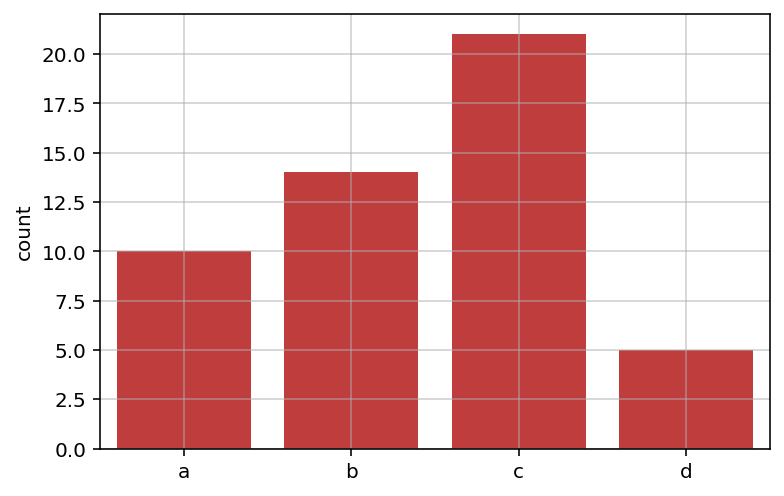

In [34]:
seed(314)
obs = choice(X, size=50, p=probs)
sns.countplot(obs, order=X, color="tab:red")
plt.grid(alpha=0.6)

## Distribuciones

A fin de poder describir nuestros datos en términos probabilisticos es necesario asignarle una distribución de probabilidad. Bajo un efoque paramétrico, podríamos asumir que nuestros datos se comportan respecto a una distribución de probabilidad previamente definida. En la siguiente sección presentamos algunas distribuciones de probabilidad para variables aleatorias continuas y discretas.

In [35]:
from ipywidgets import IntSlider, FloatSlider, interact

### Bernoulli

$$
    \text{Bern}(x|p) = p^x(1-p)^{1-x}
$$

In [36]:
from scipy.stats import bernoulli

In [37]:
@interact(p=FloatSlider(min=0, max=1, step=0.1, value=0.5))
def bern_plot(p):
    X = [0, 1]
    bern = bernoulli(p)
    ps = bern.pmf(X)
    plt.bar(X, ps, color="#872325")
    plt.ylim(0, 1)

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), Output()), _dom_classes=('widget-inter…

### Binomial

$$
    \text{Bin}(k|n, p) =  {n \choose k} p^n(1-p)^{n-k}
$$

In [38]:
from scipy.stats import binom

In [39]:
@interact(p=FloatSlider(min=0, max=1, step=0.1, value=0.5))
def bin_plot(p):
    n = 11
    X = np.arange(11)
    ps = binom.pmf(X, n, p)
    plt.bar(X, ps, color="#872325")
    plt.ylim(0, 0.3)

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), Output()), _dom_classes=('widget-inter…

### Multinomial

$$
    \text{Mult}({\bf x}|M, {\boldsymbol \mu}) = {M \choose x_1 \ldots x_K} \prod_{k=1}^K \mu_k^{x_k}
$$

In [40]:
from scipy.stats import multinomial

In [41]:
@interact(p=FloatSlider(min=0, max=1, step=0.1, value=0.5),
          n=IntSlider(min=1, max=12, step=1, value=6))
def multinomial_plot(p, n):
    mult = multinomial(n, [p, 1 - p])
    X = np.mgrid[:7, :7].reshape(2, -1).T
    zz = mult.pmf(X).reshape(7, 7)
    sns.heatmap(zz, linewidths=0.1, cmap="inferno")
    plt.xlabel("$X_1$", fontsize=15)
    plt.ylabel("$X_2$", fontsize=15)

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), IntSlider(value=6, description='n', ma…

### Distribución Gaussiana (Normal)

$$
    \mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(x - \mu)^2\right)
$$

In [42]:
from scipy.stats import norm

In [43]:
@interact(mu=FloatSlider(min=-1, max=1, step=0.1, value=0),
          sigma=FloatSlider(min=0.1, max=1, step=0.1, value=1))
def gaussian_plot(mu, sigma):
    X = np.linspace(-3, 3, 100)
    N = norm(loc=mu, scale=sigma)
    ps = N.pdf(X)
    plt.plot(X, ps, color="#872325")
    plt.ylim(0, 0.8)

interactive(children=(FloatSlider(value=0.0, description='mu', max=1.0, min=-1.0), FloatSlider(value=1.0, desc…

### Distribución Gaussiana Multivariada

$$
    \mathcal{N}({\bf x}|{\boldsymbol \mu}, {\boldsymbol \Sigma}) = \frac{1}{(2\pi)^{M/2}|{\boldsymbol \Sigma}|^{1/2}} \exp\left(-\frac{1}{2}({\bf x} - {\boldsymbol \mu})^T{\boldsymbol \Sigma}^{-1}({\bf x} - {\boldsymbol \mu})\right)
$$

In [44]:
from scipy.stats import multivariate_normal
from numpy.linalg.linalg import LinAlgError

In [45]:
@interact(mux=FloatSlider(min=-1, max=1, step=0.1, value=0),
          muy=FloatSlider(min=-1, max=1, step=0.1, value=0),
          sxx=FloatSlider(min=0.1, max=1, step=0.1, value=0.5),
          syy=FloatSlider(min=0.1, max=1, step=0.1, value=0.5),
          sxy=FloatSlider(min=-1, max=1, step=0.1, value=0))
def multivariate_gaussian_plot(mux, muy, sxx, syy, sxy):
    Sigma = np.array([
        [sxx, sxy],
        [sxy, syy]
    ])
    mu = np.array([mux, muy])
    try:
        mnorm = multivariate_normal(mu, Sigma)
    except (ValueError, LinAlgError):
        return f"Σ is not positive definite"
    
    X = np.mgrid[-3:3:0.1, -3:3:0.1].reshape(2, -1).T
    zz = mnorm.pdf(X).reshape(60, 60)
    xx, yy = X.T.reshape(2, 60, 60)
    plt.contourf(xx, yy, zz)
    plt.xlabel("$X_1$", fontsize=15)
    plt.ylabel("$X_2$", fontsize=15)
    plt.xlim(-2, 2)

interactive(children=(FloatSlider(value=0.0, description='mux', max=1.0, min=-1.0), FloatSlider(value=0.0, des…

### Estadísticos de una variable aleatoria

Para capturar la información que una distribución nos puede proporcionar sobre una variable aleatoria es común distinguir una distribución de probabilidad por medio de sus propiedades. Dos propiedades comúnes son la esperanza y la varianza.

**Esperanza de una variable aletoria**  
*El centro de masa* de la variable aletoria

Para $X$ continua
$$
    \mathbb{E}[X] = \int_{D_X} x f(x) dx
$$

Para $X$ discreta
$$
    \mathbb{E}[X] = \sum_{x \in D_X} x P(X=x)
$$

**Varianza de una variable aleatoria**  
Medida de disperción promedio de los valores valores de su media (esperanza)

$$
\begin{align}
    \mathbb{V}[X] &= \mathbb{E}[(X - \mathbb{E}[X])^2] \\
                  &= \int_{D_x} \left(x - \mathbb{E}[X]\right)^2 f(x) dx \\
                  &= \mathbb{E}[X^2] - \mathbb{E}^2[X]
\end{align}
$$

**Desviación Estándar**  
$$
\text{std}[X] = \mathbb{V}^{1/2}[X]
$$


#### Ejemplos 

Si $X \sim \text{Bern}(p)$,

$$
    \mathbb{E}[X] = p\\
    \mathbb{V}[X] = p(1-p)
$$

---

Si $X \sim N(\mu, \sigma^2)$,

$$
    \mathbb{E}[X] = \mu\\
    \mathbb{V}[X] = \sigma^2
$$

**Referncias Adicionales**
1. [Probability and Statistics Cookbook](http://statistics.zone/)
2. Murphy, Kevin P. Machine Learning: a Probabilistic Perspective. MIT Press, 2012. Chapter 2